# Data Science Final Project: Part 1 Analysis

This is a preliminary analysis of the rental data to predict rents for test 2 data. It is expected further work in Part 2 will result in improved estimations. This analysis and the outcomes will form the basis of Part 2.  
This file has been broken up into 3 parts: 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [7]:
train_df.sample(5).transpose()

rental_id,7141042,7341928,7170343,7376350,7151179
addr_unit,#10E,#6C,#11A,#4A,#2F
building_id,18717778,69106,18717766,18350323,341611
bedrooms,1,3,3,1,3
bathrooms,1,1,1,1,1
size_sqft,763,1100,948,675,1000
created_at,2018-05-03 06:00:14,2018-07-07 10:03:07,2018-05-11 16:55:21,2018-07-17 17:56:43,2018-05-06 11:47:50
addr_street,12 STUYVESANT OVAL,279 E 44 STREET,309 AVENUE C,23-92 24 STREET,186 BROADWAY
addr_city,New York,New York,New York,Astoria,Brooklyn
addr_zip,10009,10017,10009,11105,11211
addr_lat,40.7317,40.7515,40.7317,40.7756,40.7097


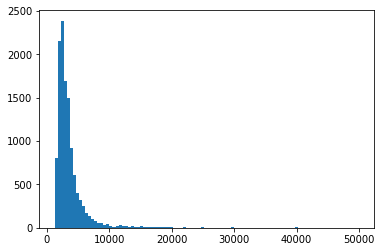

In [5]:
_ = plt.hist(train_df['rent'], bins=100)

In [7]:
train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

In [8]:
train_df['rent'].isna().sum()

0

In [9]:
print(list(train_df))

['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']


In [11]:
train_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,11597.000000,11874.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,1935.982668,73.588716,0.300333,0.466083,0.035917,0.542583,0.029833,0.293000,0.496667,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,158.157134,2681.611157,0.458422,0.498869,0.186090,0.498204,0.170134,0.455157,0.500010,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,0.000000,0.016700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,1915.000000,1.616700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,1931.000000,2.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,1987.000000,4.366700,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,2019.000000,103343.616700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [12]:
train_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,0.026593,-0.006980,-0.042830,0.061696,-0.031611,0.023323,-0.012521,0.004550,0.040899,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,-0.056614,0.014171,-0.233059,-0.278231,0.049998,0.046002,-0.046021,-0.206094,0.023819,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,-0.004480,0.017966,0.108987,0.095867,0.124532,0.161132,0.050068,0.113062,0.087348,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,-0.021524,0.007718,0.047766,0.029836,0.155044,0.111761,0.041965,0.022605,0.032325,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,-0.004916,0.023660,-0.410034,-0.362939,-0.072233,-0.166108,-0.135857,-0.287916,-0.115378,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,-0.002415,-0.026215,0.191486,0.167685,0.019505,0.078029,0.054610,0.115376,0.015503,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,-0.003623,-0.012528,-0.259673,-0.182011,-0.070451,-0.138343,-0.085478,-0.224737,-0.153365,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,0.010451,0.021091,-0.380284,-0.326176,-0.084767,-0.173532,-0.131706,-0.263453,-0.144695,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,0.005694,0.015880,-0.403373,-0.351657,-0.081656,-0.185248,-0.132950,-0.292240,-0.160086,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,0.151318,-0.011722,0.664202,0.560443,-0.024808,0.229530,0.112042,0.633673,0.205669,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707


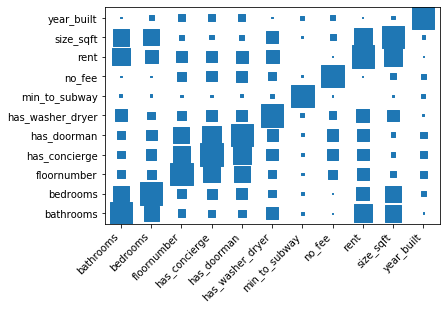

In [14]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

columns = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman', 'rent', 'has_washer_dryer', 'has_concierge', 'floornumber'
]
corr = train_df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

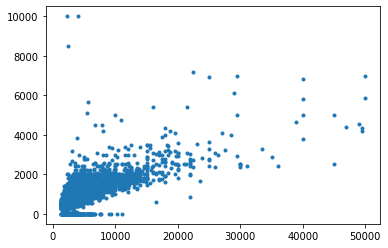

In [16]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

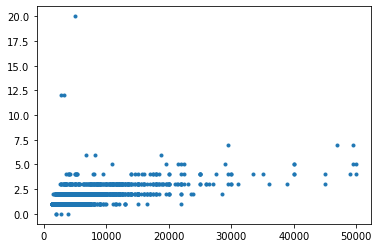

In [17]:
_ = plt.plot(train_df['rent'], train_df['bathrooms'], marker='.', linestyle='none')

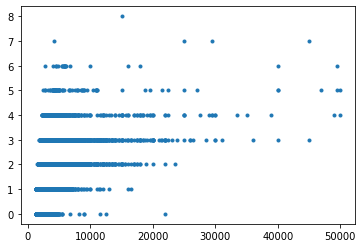

In [51]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [0]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
train_features = train_df[feature_cols] 

## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. This round we will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. 

In [25]:
train_df['bedrooms'].isna().sum()


0

In [29]:
train_df['year_built'].isna().sum()

403

In [27]:
train_df['bathrooms'].isna().sum()

0

In [28]:
train_df['min_to_subway'].isna().sum()

126

In [30]:
train_df['size_sqft'].isna().sum()

0

In [31]:
train_df['no_fee'].isna().sum()

0

In [32]:
train_df['has_doorman'].isna().sum()

0

In [33]:
train_df['has_washer_dryer'].isna().sum()

0

In [37]:
train_df['floornumber'].isna().sum()

1277

In [40]:
train_df['floornumber'].describe()

count    10723.000000
mean         6.182738
std          7.671545
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [44]:
train_df['min_to_subway'].describe()

count     11874.000000
mean         73.588716
std        2681.611157
min           0.016700
25%           1.616700
50%           2.750000
75%           4.366700
max      103343.616700
Name: min_to_subway, dtype: float64

In [45]:
train_df['year_built'].describe()

count    11597.000000
mean      1935.982668
std        158.157134
min          0.000000
25%       1915.000000
50%       1931.000000
75%       1987.000000
max       2019.000000
Name: year_built, dtype: float64

The features all have large outliers that result in a much higher mean than median so we will use median for the impute value for the missing values. 

In [0]:
# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

#### 2. Outlier Data
From the above analysis it can be seen that the size_sqft and bathrooms have the value 0 for some data points. It is not possible for a rental space to have no size and it unusal for no bathroom in a rental. 

In [52]:
(train_features['size_sqft']==0).sum()
## 841 values have outlier value of 0 for size_sqft

841

In [53]:
(train_features['bathrooms']==0).sum()
## 841 values have outlier value of 0 for size_sqft

4

In [54]:
(train_features['bedrooms']==0).sum()
## 841 values have outlier value of 0 for size_sqft

1556

##### Large data points

In [0]:
o_df = train_df.loc[train_df.size_sqft>=8000]

In [67]:
o_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7410124,#47,18246988,2,1.0,8500.0,2018-07-25 20:14:29,180 72 STREET,Brooklyn,11209,40.633999,-74.030701,3337149.0,3059060018,0.0,NaN,6.2000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,2400,0,HOT!! HUGE 2 BEDROOM IN A BEAUTIFUL PREWAR BU...,Bay Ridge,Brooklyn,47,47.0,NaN
7352536,#2,683038,2,1.0,10000.0,2018-07-10 18:03:07,1120 76 STREET,Brooklyn,11228,40.621860,-74.012089,3160481.0,3062310013,3.0,1955.0,11.9833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2300,0,Beautiful two bedroom apartment in private hou...,Dyker Heights,Brooklyn,2,2.0,NaN
7148494,#3,1493896,5,1.0,9999.0,2018-05-04 17:04:02,801 WOODWARD AVENUE,Ridgewood,11385,40.703639,-73.903097,4083359.0,4034820062,3.0,1901.0,1.4000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4000,1,"NO FEE! Expansive, true 5BR/1.5BA full-floor a...",Ridgewood,Queens,3,3.0,NaN


In [72]:
obd_df = train_df.loc[train_df.bedrooms> 6]
obd_df

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7204471,#1,205114,8,3.0,3500.0,2018-05-24 03:09:47,98 LINCOLN PLACE,Brooklyn,11217,40.676331,-73.976775,3019614.0,3009510013,3.0,1899.0,3.0333,0,0,0,0,0,0,0,1,0,0,0,0,1,0,15000,0,This gorgeous four story home radiates eleganc...,Park Slope,Brooklyn,1,1.0,NaN
7217803,#UPPER,20905,7,4.0,5000.0,2018-05-29 21:15:31,116 SULLIVAN STREET,New York,10012,40.726101,-74.002899,1007810.0,1005040029,5.0,1900.0,1.0167,0,0,1,0,0,0,1,1,0,1,0,0,1,0,45000,0,The Upper Apartment at 116 Sullivan Street is ...,Soho,Manhattan,UPPER,NaN,NaN
7356136,NaN,71734,7,4.0,6950.0,2018-07-11 15:50:18,461 EAST 57 STREET,New York,10022,40.757728,-73.960818,1081204.0,1013690022,4.0,1900.0,3.1833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25000,0,"461 East 57th Street is a grand 32’ wide, four...",Midtown East,Manhattan,NaN,NaN,NaN
7146658,NaN,56881,7,7.0,7000.0,2018-05-04 12:49:49,51 WEST 73 STREET,New York,10023,40.777983,-73.977430,1028690.0,1011260107,4.0,1910.0,2.3167,0,1,1,1,0,0,0,1,0,0,0,0,1,0,29500,0,This park block single family ELEVATOR townhou...,Upper West Side,Manhattan,NaN,NaN,NaN
7371637,#1,283312,7,2.0,1800.0,2018-07-16 16:27:49,1033A DE KALB AVENUE,Brooklyn,11221,40.693642,-73.933648,3388351.0,3015990075,3.0,1931.0,4.1167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4195,1,This is a huge floor through apt. with no less...,Bedford-Stuyvesant,Brooklyn,1,1.0,NaN


In [71]:
obath_df = train_df.loc[train_df.bathrooms>=8]
obath_df
## Clearly row 7160572 of 12 bathrooms is an error as the description says 2 bed 2 bath
## row 7236325 also seems an error as there are only 2 bedrooms, most likely it should be 2 bath

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7236325,#7,87595,2,20.0,1200.0,2018-06-04 15:07:12,420 EAST 86 STREET,New York,10028,40.776358,-73.948907,1085655.0,1015657501,6.0,1935.0,5.6833,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5000,0,.,Upper East Side,Manhattan,7,NaN,NaN
7151821,#6,126724,3,12.0,1200.0,2018-05-06 20:10:38,821 RIVERSIDE DRIVE,New York,10032,40.835610,-73.946140,1063285.0,1021350004,3.0,1900.0,2.1333,0,0,0,1,0,0,1,1,0,0,0,0,0,0,3200,1,Washington Heights\nOversized True 3 Bedroom\n...,Washington Heights,Manhattan,6,6.0,NaN
7160572,#D,951334,2,12.0,1069.0,2018-05-09 10:46:26,105 OCEANA DRIVE EAST,Brooklyn,11235,40.576302,-73.957497,3350420.0,3087207512,7.0,2002.0,2.4833,0,1,0,1,0,1,1,1,0,0,0,1,0,0,2700,0,Nice 2 bed 2bath at Oceana Condominium&Club\r\...,Brighton Beach,Brooklyn,D,NaN,NaN


At this point we are going to just be mindful of the outliers. In Part 2 we may consider adjusting these but it will depend if they will have an impact upon the results. At the moment they are only a couple of points out of 12,000.

## Data Modelling 
This section we look at different models and model our training data

In [24]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features, train_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

In [16]:
# construct predictions for linear regression 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

3674316.2820333852

In [18]:
# construct predictions for random forest regression
test_df['predicted'] = rf.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

2220135.581283559

In [25]:
# construct predictions for gradient boosting regression
test_df['predicted'] = gbt.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

2367734.7918685228

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

Model | Description| MSE
--- | --- | --
Linear Regression | train_df: No additional data | 3674316.2820333852
Random Forrest | train_df: No additional | 2220135.581283559
Gradient Boosting | train_df: No additional | 2367734.7918685228